<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.791228  99.076661  41.836460  ...  197.638926  197.800222 -0.161296
      1.0    50.865957  29.156174  85.806466  ...  176.398702  175.715437  0.683265
      2.0    53.241453  79.271011  58.287223  ...  200.812085  200.834005 -0.021921
      3.0    44.023871  29.059533  83.136568  ...  165.443415  166.104022 -0.660608
      4.0    84.337116  32.041489  65.096780  ...  191.796633  191.456514  0.340120
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  29.398461  57.082024  32.339558  ...  128.779113  128.790072 -0.010959
      116.0  48.696410  63.064864  38.042694  ...  159.532445  159.804687 -0.272242
      117.0  49.277983  88.902592  67.228881  ...  216.090351  215.375183  0.715168
      118.0  28.408715  73.675396  95.544492  ...  207.946122  207.586590  0.359531
      119.0  63.878747  21.259397  29.022068  ...  124.059680  124.261804 -0.202124

[120000 rows x 7 columns]

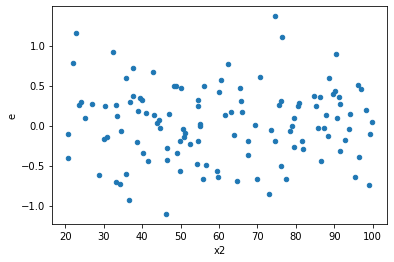

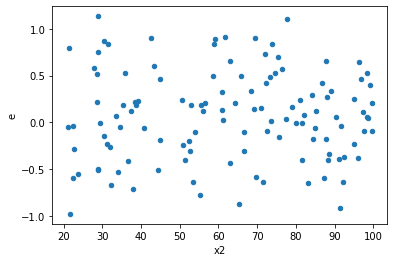

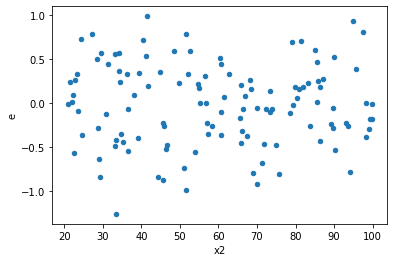

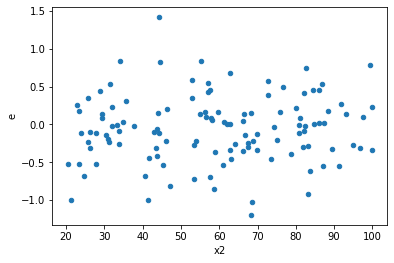

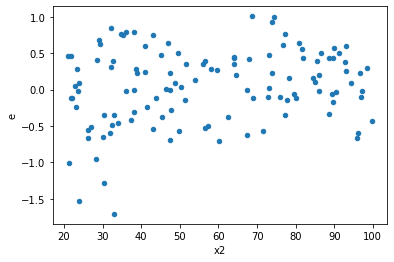

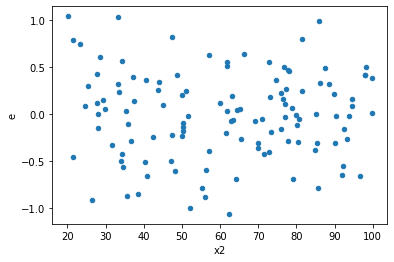

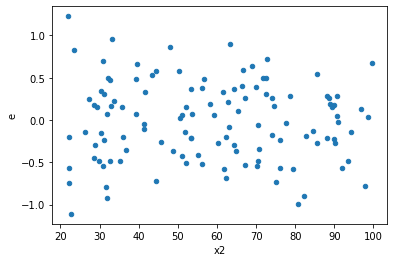

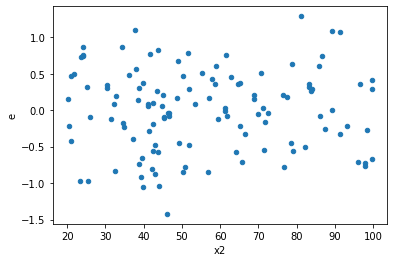

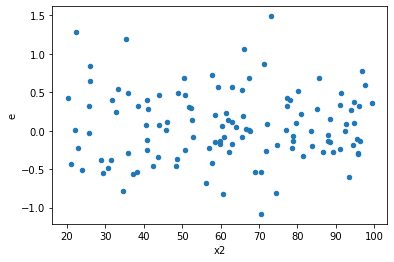

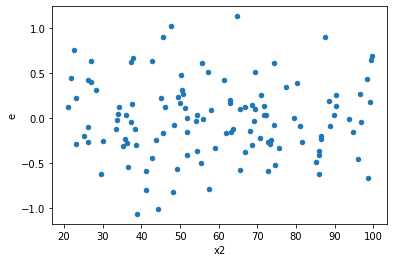

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,53.0,61.0,9.495149034550904,11.009423290071926,0.17915375536888498,0.18048234901757254,1.0074159408266488,0.9729322958907507,0.5135338520546247,0.48646614794537535,Reject005=1 : Homoscedasticity
1.0,66.0,48.0,12.475227696007224,15.41501214629628,0.1890186014546549,0.32114608638117254,1.6990184241640085,0.05543602233619094,0.9722819888319045,0.02771801116809547,Reject005=1 : Homoscedasticity
2.0,56.0,58.0,10.439333261813012,10.961498183390846,0.18641666538951807,0.18899134798949735,1.0138114400587495,0.9576514593768932,0.5211742703115534,0.4788257296884466,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,8.572405783037379,11.425535788879738,0.16174350534032791,0.18730386539147112,1.1580302096047759,0.5775306479189282,0.7112346760405359,0.2887653239594641,Reject005=1 : Homoscedasticity
4.0,52.0,62.0,10.910414252927726,13.915394504996094,0.20981565871014857,0.2244418468547757,1.0697097072475061,0.7946255674566016,0.6026872162716992,0.3973127837283008,Reject005=1 : Homoscedasticity
5.0,45.0,69.0,7.594005306476849,12.307208659508564,0.1687556734772633,0.17836534289142847,1.0569442746199575,0.8236025965516847,0.5881987017241577,0.41180129827584233,Reject005=1 : Homoscedasticity
7.0,58.0,56.0,10.288580923893775,12.846483125543442,0.17738932627403062,0.2294014843847043,1.293209062817711,0.33572747571750616,0.8321362621412469,0.16786373785875308,Reject005=1 : Homoscedasticity
11.0,57.0,57.0,10.23720419267329,15.356145141116802,0.17960007355567176,0.2694060551073123,1.5000331000633071,0.1288046937249614,0.9355976531375193,0.0644023468624807,Reject005=1 : Homoscedasticity
13.0,47.0,67.0,8.183278712063096,14.025766088860708,0.17411231302261906,0.20933979237105535,1.202326180939655,0.48347643852000766,0.7582617807399962,0.24173821926000383,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,53.0,61.0,9.495149034550904,11.009423290071926,0.17915375536888498,0.18048234901757254,1.0074159408266488,0.9729322958907507,Reject005=1 : Homoscedasticity
1.0,66.0,48.0,12.475227696007224,15.41501214629628,0.1890186014546549,0.32114608638117254,1.6990184241640085,0.05543602233619094,Reject005=1 : Homoscedasticity
2.0,56.0,58.0,10.439333261813012,10.961498183390846,0.18641666538951807,0.18899134798949735,1.0138114400587495,0.9576514593768932,Reject005=1 : Homoscedasticity
3.0,53.0,61.0,8.572405783037379,11.425535788879738,0.16174350534032791,0.18730386539147112,1.1580302096047759,0.5775306479189282,Reject005=1 : Homoscedasticity
4.0,52.0,62.0,10.910414252927726,13.915394504996094,0.20981565871014857,0.2244418468547757,1.0697097072475061,0.7946255674566016,Reject005=1 : Homoscedasticity
5.0,45.0,69.0,7.594005306476849,12.307208659508564,0.1687556734772633,0.17836534289142847,1.0569442746199575,0.8236025965516847,Reject005=1 : Homoscedasticity
6.0,62.0,52.0,15.270888482323464,9.669365322120951,0.24630465294070103,0.1859493331177106,0.7549566396639643,0.28788241779097606,Reject005=1 : Homoscedasticity
7.0,58.0,56.0,10.288580923893775,12.846483125543442,0.17738932627403062,0.2294014843847043,1.293209062817711,0.33572747571750616,Reject005=1 : Homoscedasticity
8.0,56.0,58.0,14.111472203973719,9.130065768106613,0.2519905750709593,0.15741492703632093,0.6246857724420593,0.07906715416788514,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      873
Reject005=0 : Heteroscedasticity    127
Name: Result_test, dtype: int64